In [ ]:
!pip install bertopic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from bertopic import BERTopic

In [ ]:
from transformers import pipeline
import torch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Load Labelled Text**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KHP/Results/Climate_Youth_Sentiment_Emotion_Labelled.csv')

In [ ]:
df.sample(n=2)

,text,sentiment_label,sentiment_confidence,emotion_label,emotion_confidence
13530,yes its this bad and people continue breeding ...,NEG,0.973898,annoyance,0.318644
7460,I would like to see warming predictions for 20...,NEG,0.827722,desire,0.329245


#### **Only Keep Texts with Negative Sentiment**

In [ ]:
df_neg_sentiment = df[((df['sentiment_label'] == 'NEG') & (df['sentiment_confidence']>0.5))]
print(len(df_neg_sentiment))

6648


### **Topic Modeling with BERT**

In [ ]:
docs = list(df_neg_sentiment['text'].values)
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

### **Topic Analysis**

In [ ]:
df_topics = topic_model.get_topic_info()
df_topics

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2750,-1_the_and_to_of,"[the, and, to, of, is, that, it, this, are, for]",[Its actually not that hard to argue in favor ...
1,0,228,0_heat_temperatures_temperature_surface,"[heat, temperatures, temperature, surface, in,...",[Asians heat wave is making all sorts of place...
2,1,171,1_plastic_recycling_plastics_recycle,"[plastic, recycling, plastics, recycle, trash,...",[US Plastic Recycling Rates Are Even Worse Tha...
3,2,165,2_meat_animal_eating_beef,"[meat, animal, eating, beef, vegan, eat, anima...","[This But also why eat meat at all, stop eatin..."
4,3,155,3_carbon_emissions_co2_tax,"[carbon, emissions, co2, tax, we, capture, the...",[carbon neutral isnt good enough stop using th...
...,...,...,...,...,...
102,101,11,101_cancer_smoking_windmill_tobacco,"[cancer, smoking, windmill, tobacco, emerged, ...",[This is inherently the problem No Growth isnt...
103,102,11,102_corruption_corrupt_pieces_enforcers,"[corruption, corrupt, pieces, enforcers, polit...","[Corruption, Corrupt politicians use police as..."
104,103,10,103_posts_block_bots_trolls,"[posts, block, bots, trolls, votes, twitter, d...",[I understand you are trying to help and have ...
105,104,10,104_conservatives_republicans_wake_conservative,"[conservatives, republicans, wake, conservativ...","[No shit Wake up conservatives, Itll be funny ..."


In [ ]:
#df_topics = df_topics[df_topics['Topic']!=-1]
df_topics['main_topic'] = df_topics['Representation'].apply(lambda x:'_'.join(x[:2]))

In [ ]:
df_topics

,Topic,Count,Name,Representation,Representative_Docs,main_topic
0,-1,2750,-1_the_and_to_of,"[the, and, to, of, is, that, it, this, are, for]",[Its actually not that hard to argue in favor ...,the_and
1,0,228,0_heat_temperatures_temperature_surface,"[heat, temperatures, temperature, surface, in,...",[Asians heat wave is making all sorts of place...,heat_temperatures
2,1,171,1_plastic_recycling_plastics_recycle,"[plastic, recycling, plastics, recycle, trash,...",[US Plastic Recycling Rates Are Even Worse Tha...,plastic_recycling
3,2,165,2_meat_animal_eating_beef,"[meat, animal, eating, beef, vegan, eat, anima...","[This But also why eat meat at all, stop eatin...",meat_animal
4,3,155,3_carbon_emissions_co2_tax,"[carbon, emissions, co2, tax, we, capture, the...",[carbon neutral isnt good enough stop using th...,carbon_emissions
...,...,...,...,...,...,...
102,101,11,101_cancer_smoking_windmill_tobacco,"[cancer, smoking, windmill, tobacco, emerged, ...",[This is inherently the problem No Growth isnt...,cancer_smoking
103,102,11,102_corruption_corrupt_pieces_enforcers,"[corruption, corrupt, pieces, enforcers, polit...","[Corruption, Corrupt politicians use police as...",corruption_corrupt
104,103,10,103_posts_block_bots_trolls,"[posts, block, bots, trolls, votes, twitter, d...",[I understand you are trying to help and have ...,posts_block
105,104,10,104_conservatives_republicans_wake_conservative,"[conservatives, republicans, wake, conservativ...","[No shit Wake up conservatives, Itll be funny ...",conservatives_republicans


<Axes: xlabel='main_topic'>

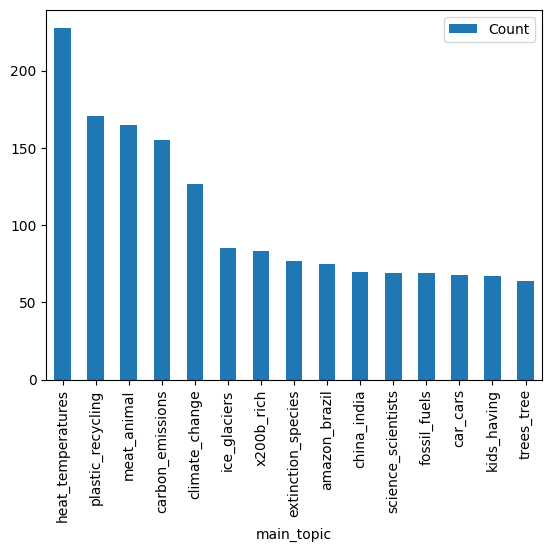

In [ ]:
df_topics[df_topics['Topic']!=-1].iloc[:15].plot(kind='bar', x='main_topic', y='Count')


#### **Intertopic Distance**

In [ ]:
topic_model.visualize_topics()

#### **Hierarchical Clustering**

In [ ]:
topic_model.visualize_hierarchy()

### **Merging Text and Assigned Topics**

In [ ]:
df_neg_sentiment.head(n=1)

,text,sentiment_label,sentiment_confidence,emotion_label,emotion_confidence
1,So are cows pigs sheep chickens and even fish ...,NEG,0.975866,neutral,0.950963


In [ ]:
df_neg_sentiment['topic'] = topics
df_neg_sentiment['topic_confidence'] = probs
df_neg_sentiment.drop(columns=['sentiment_label','sentiment_confidence'], axis=1, inplace=True)

In [ ]:
df_neg_sentiment.sample(n=5)

,text,emotion_label,emotion_confidence,topic,topic_confidence
12761,No need to raise the SS requirement age at thi...,disapproval,0.520705,22,0.726079
4187,Seems like what used to be wetdry cycles in ma...,neutral,0.384749,16,0.421761
8334,Its mostly because theres a humanitarian crisi...,desire,0.744471,8,1.000000
11781,Per capita puts the blame on the people Saying...,disapproval,0.547437,-1,0.000000
5854,Massively increasing a countries population is...,disapproval,0.784804,-1,0.000000


In [ ]:
df_topics.head(n=5)

,Topic,Count,Name,Representation,Representative_Docs,main_topic
0,-1,2750,-1_the_and_to_of,"[the, and, to, of, is, that, it, this, are, for]",[Its actually not that hard to argue in favor ...,the_and
1,0,228,0_heat_temperatures_temperature_surface,"[heat, temperatures, temperature, surface, in,...",[Asians heat wave is making all sorts of place...,heat_temperatures
2,1,171,1_plastic_recycling_plastics_recycle,"[plastic, recycling, plastics, recycle, trash,...",[US Plastic Recycling Rates Are Even Worse Tha...,plastic_recycling
3,2,165,2_meat_animal_eating_beef,"[meat, animal, eating, beef, vegan, eat, anima...","[This But also why eat meat at all, stop eatin...",meat_animal
4,3,155,3_carbon_emissions_co2_tax,"[carbon, emissions, co2, tax, we, capture, the...",[carbon neutral isnt good enough stop using th...,carbon_emissions


In [ ]:
df_neg_sentiment = df_neg_sentiment.merge(df_topics[['Topic','Representation','Representative_Docs','main_topic']], how='left', left_on='topic', right_on='Topic')
df_neg_sentiment.drop(columns=['Topic'], inplace=True)

In [ ]:
df_neg_sentiment.sample(n=2)

,text,emotion_label,emotion_confidence,topic,topic_confidence,Representation,Representative_Docs,main_topic
3449,the issue is time Building a single new reacto...,neutral,0.744926,24,1.0,"[nuclear, plants, power, reactors, build, shut...",[But what about the nuclear waste that it crea...,nuclear_plants
1073,If the US EU helped to get him in office there...,neutral,0.427258,-1,0.0,"[the, and, to, of, is, that, it, this, are, for]",[Its actually not that hard to argue in favor ...,the_and


In [ ]:
df_neg_sentiment.to_csv('/content/drive/MyDrive/KHP/Results/Climate_Youth_Negative_Sentiment_Emotion_Labelled_Topics.csv', index=False)

In [ ]:
df_text_topic = df_neg_sentiment[['text','emotion_label','Representative_Docs','main_topic','topic']]

,text,emotion_label,Representative_Docs,main_topic,topic
0,So are cows pigs sheep chickens and even fish ...,neutral,[Its actually not that hard to argue in favor ...,the_and,-1
1,Here is the problem It is already too late and...,disappointment,[Its actually not that hard to argue in favor ...,the_and,-1
2,Does the Florida govt think everyday is opposi...,annoyance,[Oh its never too late but its certainly quest...,florida_miami,51
3,I tried joining the CCL but theres no chapter ...,disappointment,[Its actually not that hard to argue in favor ...,the_and,-1
4,Species going extinct would like a word,neutral,[As a society we have already accepted the ext...,extinction_species,7


In [ ]:
df_text_topic = df_text_topic[df_text_topic['topic']!=-1]
print(len(df_text_topic))

3898


In [ ]:
df_text_topic.head()

,text,emotion_label,Representative_Docs,main_topic,topic
2,Does the Florida govt think everyday is opposi...,annoyance,[Oh its never too late but its certainly quest...,florida_miami,51
4,Species going extinct would like a word,neutral,[As a society we have already accepted the ext...,extinction_species,7
5,Its hard for me to be concerned about climate ...,sadness,[Anyone else out there feel like they are bein...,anxiety_climate,44
7,Why not be buried into the ground with nothing...,neutral,[Theres a company that will bury your cremains...,body_cremation,58
10,You can also not eat fish,neutral,[We should stop buying fish period Fishing net...,fish_fishing,30


#### What topics **nervous** young generation talk about?

In [ ]:
df_nervous = df_text_topic[df_text_topic['emotion_label']=='nervousness']

<Axes: xlabel='main_topic'>

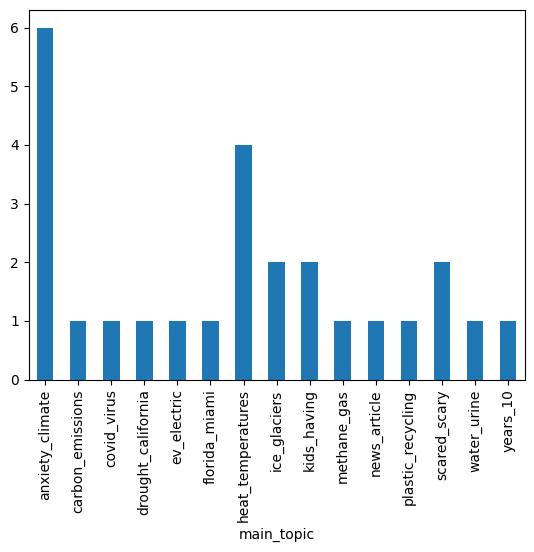

In [ ]:
df_nervous.groupby('main_topic')['topic'].count().plot(kind='bar')

In [ ]:
summarize = pipeline("summarization", model="facebook/bart-large-cnn")

In [ ]:
nervous_text = '\n '.join(list(df_nervous['text'].values[:]))
print(nervous_text)

I can only imagine the use of single use plastics is only going to go back up now though with people worried about spreading germs
 MARCH 15 2024 Grenlandi rate of melting was gradually increasing then suddenly its multiplied itself by about 8 times this is 30000000 tons an hour Thats just something unheard of and so were really worried about whats going on
 This is no an antiEV post Im just worried that the idea of everyone driving electric vehicles doesnt actually scale and were going to keep pumping carbon into the atmosphere
 Well there goes my crippling climate anxiety again Just a dull sense of dread as we sleepwalk towards impending doom
 I read that 60 of adolescents have anxiety over climate change
 Worried Of course Surrendering No way FYI at the moment its warming tropical wetlands that are contributing more of the increased naturalfeedback methane Permafrost and seafloor hydrates just get all the press
 New Orleans is very worried
 I cant read shit like this anymore because

In [ ]:
nervous_summary = summarize(nervous_text, max_length=250, min_length=30, do_sample=False)

In [ ]:
nervous_summary

[{'summary_text': '60 of adolescents have anxiety over climate change. July 2021 is set to be the hottest month on record continuing a trend that started in 2019. The negative impact of climate change is on a continuous incline because of the lack of education applicatory value and awareness.'}]